In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit
import h5py
import pyvisa
import time
from scipy.signal import savgol_filter
import scipy.signal as signal
from scipy import interpolate
from scipy.signal import windows
from matplotlib.ticker import MaxNLocator
from scipy.optimize import least_squares

In [2]:
factor = 2
SMALL_SIZE = factor*8
MEDIUM_SIZE = factor*10
BIGGER_SIZE = factor*12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [20]:
def plot_field(d, B, title=""):
    d *= 0.0254
    B *= 0.7/10

    plt.plot(d, B**(-1/3), 'o', label="data")

    # linear fit
    p1 = np.polyfit(d, B**(-1/3), 1)
    plt.plot(d, np.poly1d(p1)(d), color="red", label=f"${p1[0]:.2f}d+{p1[1]:.2f}$")

    plt.xlabel("distance [m]")
    plt.ylabel("$B^{-1/3}$ [G$^{-1/3}$]")
    plt.title(title)
    plt.legend()
    plt.grid()

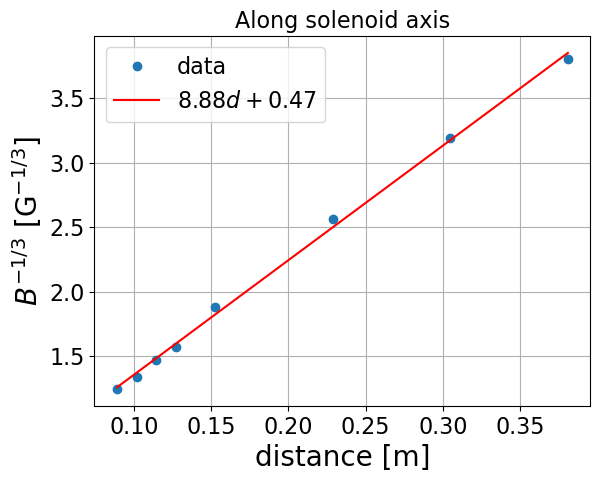

In [21]:
plot_field(
    d = np.array([3.5, 4, 4.5, 5, 6, 9, 12, 15]),
    B = np.array([7.4, 6.0, 4.5, 3.7, 2.16, .85, .44, .26]),
    title = "Along solenoid axis"
)

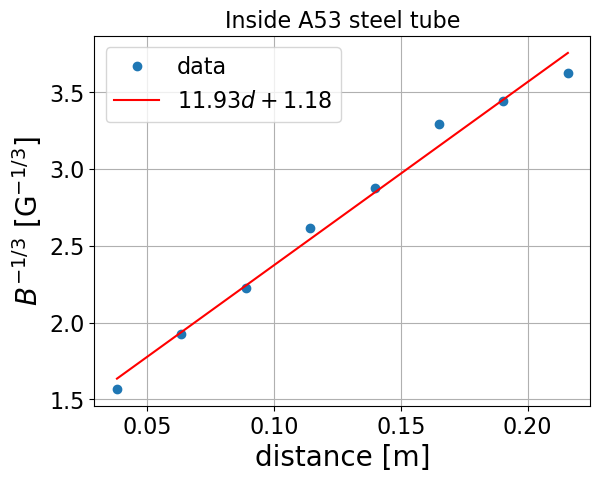

In [23]:
plot_field(
    d = np.array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
    B = np.array([3.7, 2.0, 1.3, 0.8, 0.6, 0.4, 0.35, 0.3]),
    title = "Inside A53 steel tube"
)

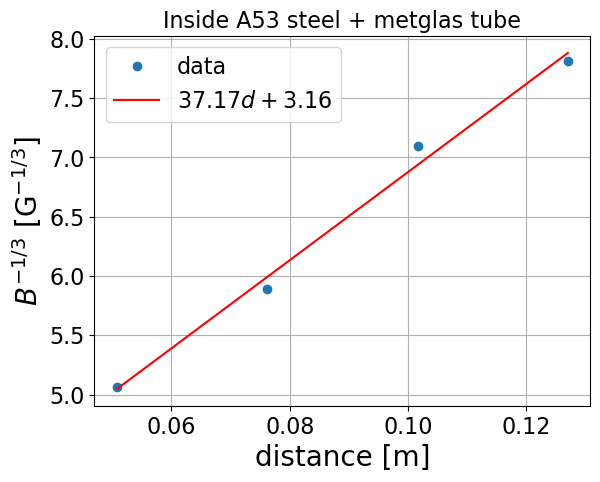

In [29]:
plot_field(
    d = np.array([2., 3, 4, 5]),
    B = np.array([.11, .07, .04, .03, ]),
    title = "Inside A53 steel + metglas tube"
)